### Calculo de gradientes sobre la imagen

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.interpolate
from scipy import ndimage

img = cv2.imread('/home/lean/Documentos/Lean/Analizador_imagenes_calcio/Luis/seleccion/010719SEL/010719VK3/vk3b002.tif', cv2.IMREAD_GRAYSCALE)
# img = np.int8(img)[:20,:20]
# vgrad = np.gradient(img)
# xgrad = vgrad[0]
# xgrad = np.int8(xgrad)
# x, y = range(0, xgrad.shape[0]), range(0,xgrad.shape[1])
# xi, yi = np.meshgrid(x, y)
# xi = np.int8(xi)
# yi = np.int8(yi)
# rbf = scipy.interpolate.Rbf(xi, yi, xgrad)
# plt.imshow(xgrad, vmin = np.amin(xgrad), vmax=np.amax(xgrad))
# plt.colorbar()
# plt.show()  

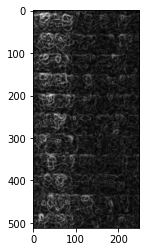

In [3]:
# Get x-gradient in "sx"
sx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=15)[:,150:400]
# Get y-gradient in "sy"
sy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=15)[:,150:400]
# Get square root of sum of squares
sobel=np.hypot(sx,sy)

# Hopefully see some edges
plt.imshow(sobel,cmap=plt.cm.gray)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

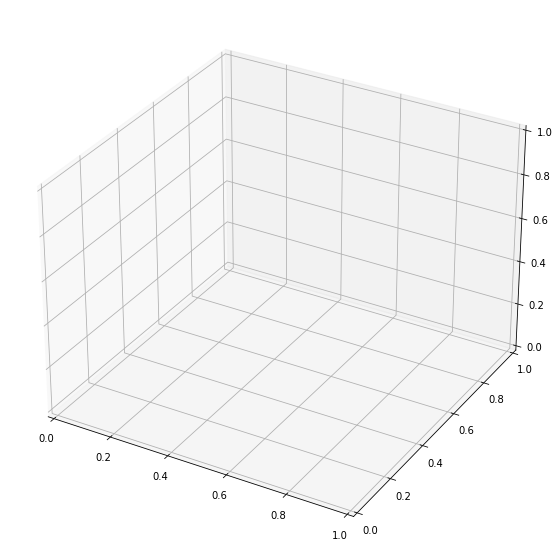

In [19]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


data = sy
#// Remove noise by blurring with a Gaussian filter ( kernel size = 3 )
data = cv2.GaussianBlur(data,(15, 15), 0)
hf = plt.figure(figsize=(16,10))
ha = hf.add_subplot(111, projection='3d')
x = range(data.shape[0])
y = range(data.shape[1])
X, Y = numpy.meshgrid(x,y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data,rcount=10, ccount=10)